In [8]:
from keras.layers import Input, Dense, Reshape, BatchNormalization
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.datasets import fashion_mnist
import numpy as np

(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

        
        

4431872/4422102 [==============================] - 0s 0us/step


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
num = 25
images = X_train[:num]
labels = Y_train[:num]

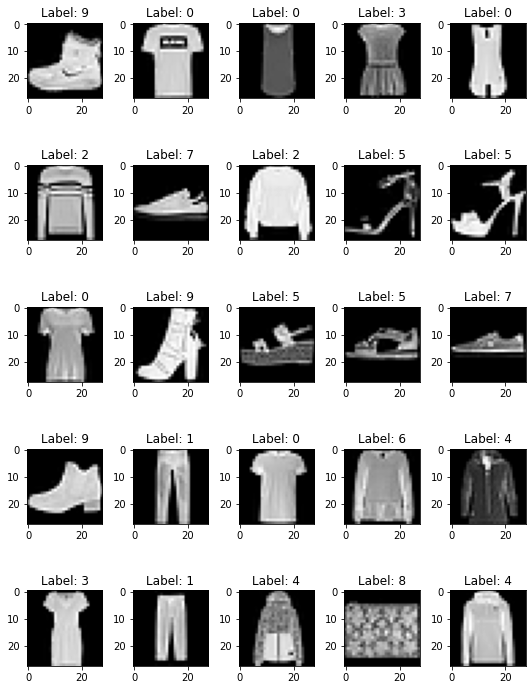

In [11]:
num_row = 5
num_col = 5# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [7]:
from sklearn.metrics import precision_score
class GAN():
    def __init__(self):

        (self.x_train, self.y_train), (self.x_test, self.y_test) = fashion_mnist.load_data()
        self.batch_size = 128
        self.half_batch_size = 64
        self.latent_dim = 100
        self.iterations = 10000
        self.optimizer = Adam(0.0002, 0.5)
        self.generator_model = self.generator() 
        self.discriminator_model = self.discriminator()
        self.combined_model = self.combined()
        

    def generator(self):
        
        input_gen = Input(shape = (self.latent_dim,))
        hidden1 = BatchNormalization(momentum=0.8)(Dense(256, activation = 'relu')(input_gen))
        hidden2 = BatchNormalization(momentum=0.8)(Dense(512, activation = 'relu')(hidden1))
        hidden3 = BatchNormalization(momentum=0.8)(Dense(1024, activation = 'relu')(hidden2))
        output = Dense(784, activation='tanh')(hidden3)
        reshaped_output = Reshape((28, 28, 1))(output)
        gen_model = Model(input_gen, reshaped_output)
        gen_model.compile(loss='binary_crossentropy', optimizer=self.optimizer)
        print(gen_model.summary())
        
        
        return gen_model
    
    def discriminator(self):
        
        input_disc = Input(shape = (784,))
        hidden1 = Dense(512, activation = 'relu')(input_disc)
        hidden2 = Dense(256, activation = 'relu')(hidden1)
        hidden3 = Dense(128, activation = 'relu')(hidden2)
        output = Dense(1, activation = 'sigmoid')(hidden3)
        disc_model = Model(input_disc, output)
        disc_model.compile(loss='binary_crossentropy', optimizer=self.optimizer, metrics=['accuracy'])
        print(disc_model.summary())
        
        return disc_model
    
    def combined(self):
        
        inputs = Input(shape = (self.latent_dim,)) 
        gen_img = self.generator_model(inputs)
        gen_img = Reshape((784,))(gen_img)
        self.discriminator_model.trainable = False
        outs = self.discriminator_model(gen_img)
        comb_model = Model(inputs, outs)
        comb_model.compile(loss='binary_crossentropy', optimizer=self.optimizer, metrics=['accuracy'])
        print(comb_model.summary())
        
        return comb_model
    
    def train(self):
        
        train_data = (self.x_train.astype(np.float32) - 127.5) / 127.5
        
        for i in range(self.iterations):
            
            batch_indx = np.random.randint(0, train_data.shape[0], size = (self.half_batch_size))
            batch_x = train_data[batch_indx]
            batch_x = batch_x.reshape((-1, 784))
            
            input_noise = np.random.normal(0, 1, size=(self.half_batch_size, 100))
            gen_outs = self.generator_model.predict(input_noise)
            gen_outs = gen_outs.reshape((-1, 784))
            
            fake_loss = self.discriminator_model.train_on_batch(gen_outs, np.zeros((self.half_batch_size,1)))
            real_loss = self.discriminator_model.train_on_batch(batch_x, np.ones((self.half_batch_size,1)))
            
            disc_loss = 0.5*np.add(fake_loss,real_loss)
            
            full_batch_input_noise = np.random.normal(0, 1, size=(self.batch_size, 100))
            gan_loss = self.combined_model.train_on_batch(full_batch_input_noise, np.array([1] * self.batch_size))
            
            print(i, disc_loss, gan_loss)
            
# training the network
gan = GAN()
gan.train()


# generating new images from trained network
import matplotlib.pyplot as plt

r, c = 5, 5
noise = np.random.normal(0, 1, (r * c, 100))

gen_imgs = gan.generator_model.predict(noise)

# Rescale images 0 - 1
gen_imgs = 0.5 * gen_imgs + 0.5

fig, axs = plt.subplots(r, c, figsize=(1.5*c,2*r))
cnt = 0
for i in range(r):
    for j in range(c):
        axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
        axs[i,j].axis('on')
        cnt += 1
plt.tight_layout()
plt.show()
fig.savefig("fashion_mnist.png")
plt.close()

1453 [0.5478723 0.71875  ] [1.0369186401367188, 0.140625]
1454 [0.53356552 0.71875   ] [1.055556297302246, 0.109375]
1455 [0.57720056 0.6875    ] [1.0419948101043701, 0.1328125]
1456 [0.56145465 0.703125  ] [0.9457208514213562, 0.203125]
1457 [0.53912282 0.7421875 ] [0.946178138256073, 0.171875]
1458 [0.56285927 0.71875   ] [1.0246447324752808, 0.09375]
1459 [0.61986783 0.6796875 ] [0.9956405162811279, 0.109375]
1460 [0.57841074 0.703125  ] [0.9300963878631592, 0.2109375]
1461 [0.60918683 0.65625   ] [0.884677529335022, 0.328125]
1462 [0.59633461 0.6328125 ] [1.0445549488067627, 0.140625]
1463 [0.54231983 0.7265625 ] [1.0706219673156738, 0.1328125]
1464 [0.5656198 0.703125 ] [1.1366972923278809, 0.1015625]
1465 [0.53082824 0.7265625 ] [0.9770183563232422, 0.1953125]
1466 [0.49158494 0.8125    ] [0.9445237517356873, 0.234375]
1467 [0.53691304 0.703125  ] [1.106633186340332, 0.109375]
1468 [0.58651671 0.7421875 ] [0.9938136339187622, 0.25]
1469 [0.53146861 0.71875   ] [0.9833179712295532

KeyboardInterrupt: ignored

In [ ]:
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [ ]:
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err
def compare_images(imageA, imageB, title):
	# compute the mean squared error and structural similarity
	# index for the images
	m = mse(imageA, imageB)
	s = ssim(imageA, imageB)
	# setup the figure
	fig = plt.figure(title)
	plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
	# show first image
	ax = fig.add_subplot(1, 2, 1)
	plt.imshow(imageA, cmap = plt.cm.gray)
	plt.axis("off")
	# show the second image
	ax = fig.add_subplot(1, 2, 2)
	plt.imshow(imageB, cmap = plt.cm.gray)
	plt.axis("off")
	# show the images
	plt.show()

In [ ]:
original = cv2.imread("/content/Original.png")
GAN = cv2.imread("/content/8e.png")

original = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
GAN = cv2.cvtColor(GAN, cv2.COLOR_BGR2GRAY)

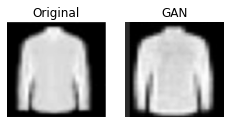

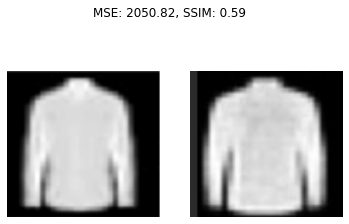

In [ ]:
fig = plt.figure("Images")
images = ("Original", original), ("GAN", GAN)
# loop over the images
for (i, (name, image)) in enumerate(images):
	# show the image
	ax = fig.add_subplot(1, 3, i + 1)
	ax.set_title(name)
	plt.imshow(image, cmap = plt.cm.gray)
	plt.axis("off")
# show the figure
plt.show()
# compare the images
compare_images(original, GAN, "Original vs. GAN")